<a href="https://colab.research.google.com/github/emznavs/ML-Python/blob/main/tf_100s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[**TensorFlow in 100 Seconds **](https://www.youtube.com/watch?v=i8NETqtGHms&ab_channel=Fireship)

In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.15.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 3.6069 - accuracy: 0.6976
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6689 - accuracy: 0.7600
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5733 - accuracy: 0.8031
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5335 - accuracy: 0.8172
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5243 - accuracy: 0.8244
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5055 - accuracy: 0.8314
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4883 - accuracy: 0.8378
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4871 - accuracy: 0.8391
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4720 - accuracy: 0.8435
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([6.6102252e-23, 2.0340873e-17, 0.0000000e+00, 8.7312109e-11,
       1.7113661e-30, 5.0156478e-02, 1.7441730e-32, 3.9701719e-02,
       3.0675075e-13, 9.1014183e-01], dtype=float32)

In [ ]:
predictions[0].shape

(10,)

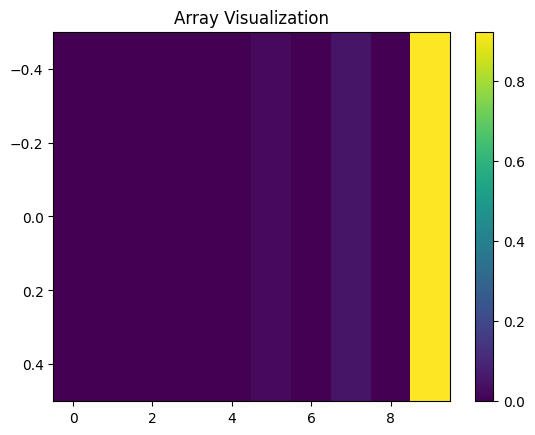

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your array
arr = np.array([7.41898383e-12, 1.27544945e-11, 1.91181993e-25, 4.10389056e-10,
                1.05934296e-37, 2.44256128e-02, 8.87446279e-17, 5.22053167e-02,
                5.14987228e-12, 9.23369050e-01], dtype=np.float32)


# Reshape the array to a 2D array (1x10)
arr_2d = arr.reshape(1, -1)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the array as an image
im = ax.imshow(arr_2d, cmap='viridis', aspect='auto')

# Add a colorbar
plt.colorbar(im)

# Set the title
plt.title('Array Visualization')

# Show the plot
plt.show()

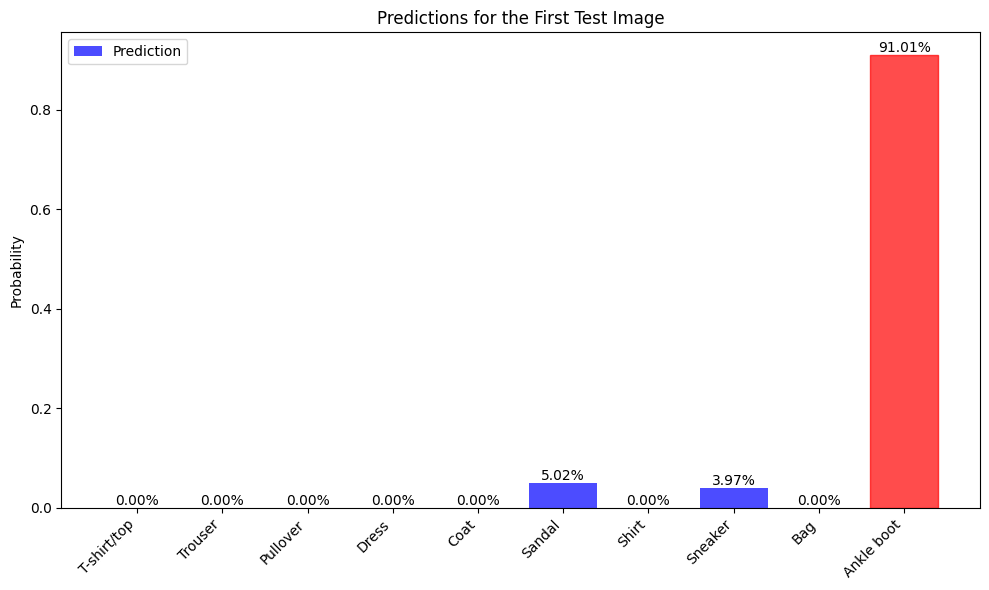

Predicted class: Ankle boot


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming predictions[0] contains your array
predictions_array = predictions[0]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
bars = ax.bar(range(10), predictions_array, color='blue', alpha=0.7)

# Customize the plot
ax.set_xticks(range(10))
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.set_ylabel('Probability')
ax.set_title('Predictions for the First Test Image')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2%}',
            ha='center', va='bottom')

# Highlight the bar with the highest probability
highest_prob_index = np.argmax(predictions_array)
bars[highest_prob_index].set_color('red')

# Add a legend
ax.legend(['Prediction', 'Highest Probability'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the predicted class
print(f"Predicted class: {class_names[highest_prob_index]}")